## Hello World in Deep Learning 

#### Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model, clone_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


### Mnist classification in a nutshell

In the next cell we train a simple fully connected neutal network to classify digits (0-9) form the mnist dataset. We use 20'000 images as our train dataset and 10'000 images are in our testset. Finally we plot the learning cuves and look at some predictions and the accuracy on the testset, you see that we already have an accuracy of around 96%.

In [2]:
(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()

# Make train data smaller
np.random.seed(72)
train_data_idx=np.random.choice(range(0,len(x_digits_train)),20000,replace=False)
x_digits_train=x_digits_train[train_data_idx]
y_digits_train=y_digits_train[train_data_idx]

# Preprocess data 
x_digits_train = x_digits_train.astype('float32')
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255
x_digits_test = x_digits_test/ 255
y_digits_train = to_categorical(y_digits_train, 10)
y_digits_test = to_categorical(y_digits_test, 10)
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))


# Define model 
model_digits = Sequential()
model_digits.add(Flatten(input_shape=(28,28,1)))
model_digits.add(Dense(500, activation='relu'))
model_digits.add(Dense(50, activation='relu'))
model_digits.add(Dense(10, activation='softmax'))
# Compile model
model_digits.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
history=model_digits.fit(x_digits_train, y_digits_train,validation_data=(x_digits_test, y_digits_test),
                         batch_size=128, epochs=5, verbose=1)

W0909 14:39:45.307912 26048 deprecation.py:506] From C:\Users\murl\AppData\Local\Continuum\anaconda3\envs\cas_dl_2019\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 20000 samples, validate on 10000 samples
Epoch 1/5
20000/20000 [==============================] - 2s 107us/sample - loss: 0.4275 - acc: 0.8805 - val_loss: 0.2281 - val_acc: 0.9330
Epoch 2/5
20000/20000 [==============================] - 2s 98us/sample - loss: 0.1651 - acc: 0.9514 - val_loss: 0.1504 - val_acc: 0.9541
Epoch 3/5
20000/20000 [==============================] - 3s 128us/sample - loss: 0.1054 - acc: 0.9670 - val_loss: 0.1425 - val_acc: 0.9572
Epoch 4/5
20000/20000 [==============================] - 2s 116us/sample - loss: 0.0743 - acc: 0.9772 - val_loss: 0.1201 - val_acc: 0.9639
Epoch 5/5
20000/20000 [==============================] - 2s 94us/sample - loss: 0.0509 - acc: 0.9850 - val_loss: 0.1174 - val_acc: 0.9651


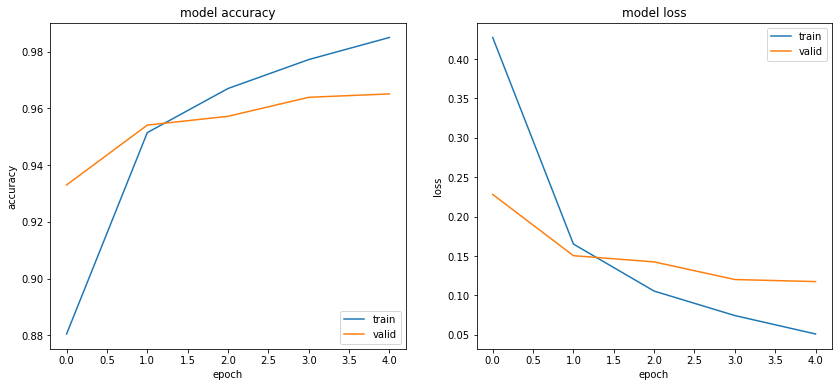

In [3]:
# summarize history for accuracy
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

predicted probabilities [[5.7240671e-12 2.9510897e-10 4.6378372e-07 4.7773656e-09 2.9823144e-13
  3.7805857e-12 2.4523355e-15 9.9999952e-01 1.9785479e-11 7.6379072e-09]]
max probability 0.9999995
predicted label 7
true label 7


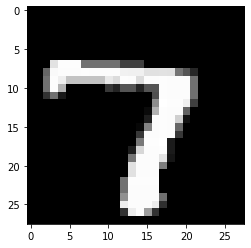

In [4]:
# prediction of an image of the testset
i=np.random.choice(range(0,len(x_digits_test)))
plt.imshow(x_digits_test[i,:,:,0],cmap="gray")
pred=model_digits.predict(x_digits_test[i:i+1])
print("predicted probabilities",pred)
print("max probability",np.max(pred))
print("predicted label",np.argmax(pred))
print("true label",np.argmax(y_digits_test[i]))


In [5]:
#evaluation on the testset
model_digits.evaluate(x_digits_test,y_digits_test)

10000/10000 [==============================] - 1s 122us/sample - loss: 0.1174 - acc: 0.9651


[0.11743911891421303, 0.9651]

### Mnist classification in more detail

Now let's look at the code above in more detail.
First we load the mnist dataset and look at the size of the train and test dataset. We have 60'000 train images and 10'000 test iamges. The images are greyscale images and the size is 28x28 pixels.

In [6]:
#Load pre-shuffled MNIST data into train and test sets
(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()

In [7]:
print(x_digits_train.shape)
print(x_digits_test.shape)

print(y_digits_train.shape)
print(y_digits_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In the next few cells we make the train dataset smaller by sampling 10'000 random images of the 60'000. We look at the distribution of the labels in both datasets and you can see that both dataset are more or less balanced.

In [8]:
np.random.seed(72)
train_data_idx=np.random.choice(range(0,len(x_digits_test)),10000,replace=False)
x_digits_train=x_digits_train[train_data_idx]
y_digits_train=y_digits_train[train_data_idx]
print(x_digits_train.shape)
print(y_digits_train.shape)


(10000, 28, 28)
(10000,)


In [9]:
np.unique(y_digits_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1001, 1127,  991, 1032,  980,  863, 1014, 1070,  944,  978],
       dtype=int64))

In [10]:
np.unique(y_digits_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

Let's look at the pixelvalues of a train image, you can see that the values are between 0 and 255.  We normalize the values to be in the range from 0 to 1, by values with 255. If you look at the labels, you see that the lables are values form 0 to 9, to train a neural network we need to transform it to the so called one hot encoding. 

In [11]:
#print the pixel values of the first "image"
print(x_digits_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  44 157 241 254 254 254 201 115   3
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  50 237 254 245 237 237 237 248 254  79
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 107 242 149  32   0   0   0  96 254 216
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  24  32   0   0   0   0   0   0 254 237
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 254 237
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [12]:
#print the label of the first "image"
print(y_digits_train[0])


2


In [13]:
# Preprocess data (normalize to be in the range [0,1])
x_digits_train = x_digits_train.astype('float32')
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255
x_digits_test = x_digits_test/ 255

In [14]:
# Preprocess class labels -- one hot encoding
y_digits_train = to_categorical(y_digits_train, 10)
y_digits_test = to_categorical(y_digits_test, 10)

In [15]:
#print the pixel values of the first "image"
# now the values are form 0 to 1
print(x_digits_train[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.17254902 0.6156863  0.94509804
  0.9960784

In [16]:
#print the label of the first "image"
#the 2 form above, one hot encoded
print(y_digits_train[0])


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
print(x_digits_train.shape)
print(x_digits_test.shape)

print(y_digits_train.shape)
print(y_digits_test.shape)


(10000, 28, 28)
(10000, 28, 28)
(10000, 10)
(10000, 10)


Let's plot a few images to get a feeling for the dataset and see how hard the task is.
We plot the first 9 images of the training dataset.

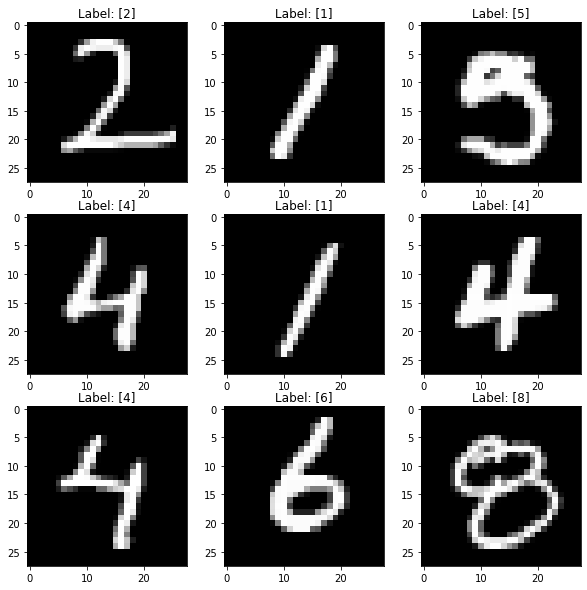

In [18]:
plt.figure(figsize=(10,10))
for i in range(0,9):
    sample_img = x_digits_train[i];
    # plot the image
    plt.subplot(3,3,i+1)
    plt.imshow(sample_img,cmap="gray")
    plt.title ("Label: %s"%np.where(y_digits_train[i]));

In the next few cells we reshape the train and test dataset to be a 4 dim array. We have grayscale images and only one channel so we add one channel in the last dim. We define a neural network with keras, it has two fully connected layers with 500 and 50 nodes with the relu activation function. The last layer has 10 nodes and the softmax activation function, so we can interpret the output as probability for the predicted label. 

In [19]:
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))

print(x_digits_train.shape)
print(x_digits_test.shape)


(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [20]:
# Define model architecture
model_digits = Sequential()

model_digits.add(Flatten(input_shape=(28,28,1)))

model_digits.add(Dense(500, activation='relu'))
model_digits.add(Dense(50, activation='relu'))
model_digits.add(Dense(10, activation='softmax'))
 
# Compile model
model_digits.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [21]:
model_digits.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 418,060
Trainable params: 418,060
Non-trainable params: 0
_________________________________________________________________


In the next two cells we evaluate the untrained model. As you can see the predictions of the untrained model are completely random, we have an accuracy of around 10%. If you look at single image preditions, you see that the predictions are random and wrong for most of the time. This will change when we train the model with our training dataset. To visualize the trainig process, the computational graph and development of the weights you can use Tensorboard.

In [22]:
# evaluation of the untrained model
model_digits.evaluate(x_digits_test,y_digits_test)
# you get the loss "categorical_crossentropy" and the accuracy 

10000/10000 [==============================] - 2s 178us/sample - loss: 2.3016 - acc: 0.1056


[2.301560634994507, 0.1056]

predicted probabilities [[0.0941329  0.08161116 0.1337717  0.10105841 0.09859382 0.09043127
  0.08659989 0.06921627 0.13467965 0.10990489]]
max probability 0.13467965
predicted label 8
true label 7


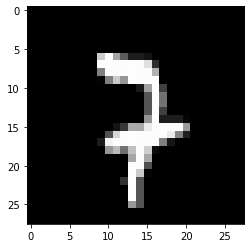

In [23]:
# prediction of an image with the untrained model
i=np.random.choice(range(0,len(x_digits_test)))
plt.imshow(x_digits_test[i,:,:,0],cmap="gray")
pred=model_digits.predict(x_digits_test[i:i+1])
print("predicted probabilities",pred)
print("max probability",np.max(pred))
print("predicted label",np.argmax(pred))
print("true label",np.argmax(y_digits_test[i]))


In [24]:
tensorboard = tf.keras.callbacks.TensorBoard(
        log_dir="C:\\Users\\murl\\Desktop\\cas_2019\\tensorboard\\mnist\\", write_graph=True,histogram_freq=0)


In [25]:
# train the model
history=model_digits.fit(x_digits_train, y_digits_train,validation_data=(x_digits_test,y_digits_test), batch_size=128, epochs=5, verbose=1, callbacks=[tensorboard])

Train on 10000 samples, validate on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 182us/sample - loss: 0.5792 - acc: 0.8380 - val_loss: 0.2846 - val_acc: 0.9193
Epoch 2/5
10000/10000 [==============================] - 2s 165us/sample - loss: 0.2239 - acc: 0.9359 - val_loss: 0.2384 - val_acc: 0.9302
Epoch 3/5
10000/10000 [==============================] - 1s 111us/sample - loss: 0.1587 - acc: 0.9540 - val_loss: 0.2051 - val_acc: 0.9394
Epoch 4/5
10000/10000 [==============================] - 1s 105us/sample - loss: 0.1153 - acc: 0.9674 - val_loss: 0.1876 - val_acc: 0.9415
Epoch 5/5
10000/10000 [==============================] - 1s 105us/sample - loss: 0.0828 - acc: 0.9768 - val_loss: 0.1756 - val_acc: 0.9463


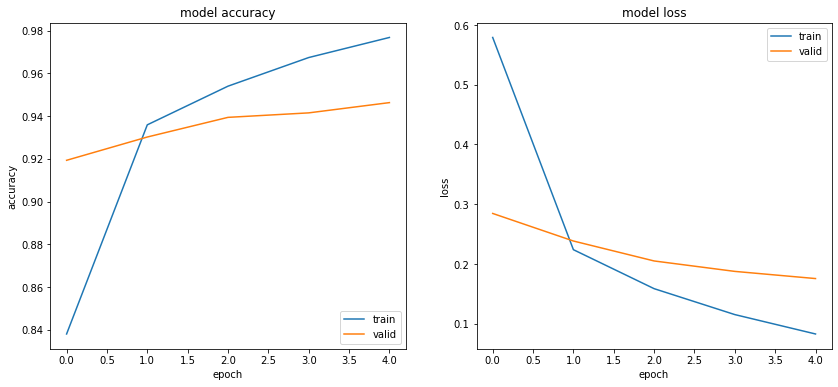

In [26]:
# summarize history for accuracy
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [27]:
# open terminal inside the juypter enviroment
# type tensorboard --logdir=C:\Users\murl\Desktop\cas_2019\tensorboard\mnist
# and then go to http://localhost:6006

In [28]:
# evaluation of the trained model
model_digits.evaluate(x_digits_test,y_digits_test)
# you get the loss "categorical_crossentropy" and the accuracy 

10000/10000 [==============================] - 1s 109us/sample - loss: 0.1756 - acc: 0.9463


[0.1755931707073003, 0.9463]

predicted probabilities [[3.1738118e-06 7.2507859e-08 1.0549275e-04 3.5975510e-05 9.9461728e-01
  2.1727636e-05 2.3100237e-04 4.3832912e-04 5.3501513e-05 4.4935094e-03]]
max probability 0.9946173
predicted label 4
true label 4


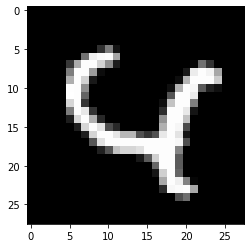

In [29]:
# prediction of an image with the trained model
i=np.random.choice(range(0,len(x_digits_test)))
plt.imshow(x_digits_test[i,:,:,0],cmap="gray")
pred=model_digits.predict(x_digits_test[i:i+1])
print("predicted probabilities",pred)
print("max probability",np.max(pred))
print("predicted label",np.argmax(pred))
print("true label",np.argmax(y_digits_test[i]))


In the next cells we calculate the accuracy on the test dataset and look at the confusion matrix. We have an accuracy of around 95% which is already very good

In [30]:
from sklearn.metrics import confusion_matrix
preds=model_digits.predict_classes(x_digits_test)
confusion_matrix(np.argmax(y_digits_test,axis=1),preds)

array([[ 958,    0,    7,    1,    0,    2,    8,    2,    2,    0],
       [   0, 1126,    4,    0,    0,    1,    3,    0,    1,    0],
       [   4,    3, 1000,    2,    4,    0,    5,   10,    3,    1],
       [   0,    3,   27,  942,    0,   11,    1,   12,   10,    4],
       [   1,    9,    6,    0,  928,    0,   12,    3,    2,   21],
       [   8,    1,    2,   22,    3,  822,   16,    4,    7,    7],
       [   7,    3,    6,    0,    7,    8,  923,    2,    2,    0],
       [   0,   18,   16,    6,    2,    2,    0,  974,    0,   10],
       [   9,   20,   20,   14,    7,   11,    6,   16,  867,    4],
       [   5,   12,    4,   11,   21,    5,    1,   23,    4,  923]],
      dtype=int64)

In [31]:
print(np.average(np.argmax(y_digits_test,axis=1)==preds))

0.9463


### Mnist classification with pure TensorFlow
In the code below you can see how do define and optimize a fully connected neural network in pure TensorFlow.

In [32]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, 784], name='x_data')
y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_data')

# From Input to first hidden layer
w_1 = tf.Variable(tf.random_normal([784, 500], stddev=0.1))
b_1 = tf.Variable(tf.random_normal([500]))
h_1_in = tf.add(tf.matmul(x, w_1), b_1)
h_1_out = tf.nn.sigmoid(h_1_in)
#h_1_out = tf.nn.relu(h_1_in)

# From first hidden layer to second hidden layer
w_2 = tf.Variable(tf.random_normal([500, 50], stddev=0.01))
b_2 = tf.Variable(tf.random_normal([50]))
h_2_in = tf.add(tf.matmul(h_1_out, w_2), b_2)
h_2_out = tf.nn.sigmoid(h_2_in)
#h_2_out = tf.nn.relu(h_2_in)

# From second hidden layer to output
w_3 = tf.Variable(tf.random_normal([50, 10], stddev=0.01))
b_3 = tf.Variable(tf.random_normal([10]))
h_3_in = tf.add(tf.matmul(h_2_out, w_3), b_3)

# Output is softmax
out = tf.nn.softmax(h_3_in)
init_op = tf.global_variables_initializer() 

In [33]:
tf.summary.FileWriter("C:\\Users\\murl\\Desktop\\cas_2019\\tensorboard\\tf_mnist\\", tf.get_default_graph()) #<--- Where to store

In [34]:
x_digits_train_flat=x_digits_train.reshape((len(x_digits_train),28*28*1))
x_digits_test_flat=x_digits_test.reshape((len(x_digits_test),28*28*1))

In [35]:
with tf.Session() as sess:
    sess.run(init_op)
    res_val = sess.run(out, feed_dict={x:x_digits_train_flat[0:1]})
res_val

array([[0.04622968, 0.10301633, 0.17625158, 0.2516106 , 0.18988186,
        0.03637291, 0.02792955, 0.0536662 , 0.07055894, 0.04448237]],
      dtype=float32)

In [36]:
loss = tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(out), reduction_indices=[1]))
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
init_op = tf.global_variables_initializer() 
vals = []
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(4000):
        idx = np.random.permutation(2400)[0:128] #simple minibatch of size 128
        loss_, _, res_ = sess.run((loss, train_op,out), feed_dict={x:x_digits_train_flat[idx], y_true:y_digits_train[idx]})
        if (i % 100 == 0):
            # Get the results for the whole train data
            acc = np.average(np.argmax(res_, axis = 1) == np.argmax(y_digits_train,axis=1)[idx])
            loss_v, res_val = sess.run([loss, out], feed_dict={x:x_digits_train_flat, y_true:y_digits_train})
            acc_v = np.average(np.argmax(res_val, axis = 1) == np.argmax(y_digits_train,axis=1))
            vals.append([loss_, acc, loss_v, acc_v])
            print("{} Training: batch_loss {} batch_acc {}  total_train_loss {} total_train_acc {}".format(i, loss_, acc, loss_v, acc_v))
    #Get test performance after the 4000 updates        
    loss_test, pred_test = sess.run([loss, out], feed_dict={x:x_digits_test_flat, y_true:y_digits_test})

0 Training: batch_loss 2.6579151153564453 batch_acc 0.1015625  total_train_loss 2.560673475265503 total_train_acc 0.0991
100 Training: batch_loss 2.303555488586426 batch_acc 0.109375  total_train_loss 2.299715280532837 total_train_acc 0.0991
200 Training: batch_loss 2.2910122871398926 batch_acc 0.1484375  total_train_loss 2.299870014190674 total_train_acc 0.1127
300 Training: batch_loss 2.3034234046936035 batch_acc 0.1015625  total_train_loss 2.2954676151275635 total_train_acc 0.107
400 Training: batch_loss 2.2940711975097656 batch_acc 0.0703125  total_train_loss 2.293339252471924 total_train_acc 0.1102
500 Training: batch_loss 2.2866883277893066 batch_acc 0.1015625  total_train_loss 2.289191246032715 total_train_acc 0.153
600 Training: batch_loss 2.2726340293884277 batch_acc 0.140625  total_train_loss 2.2834906578063965 total_train_acc 0.1086
700 Training: batch_loss 2.262467384338379 batch_acc 0.1015625  total_train_loss 2.2758705615997314 total_train_acc 0.1568
800 Training: batch_l

In [37]:
confusion_matrix(np.argmax(y_digits_test,axis=1),np.argmax(pred_test,axis=1))

array([[ 956,    0,    4,    1,    0,   13,    5,    1,    0,    0],
       [   0, 1103,    7,    5,    1,    3,    3,    1,   11,    1],
       [  18,    7,  897,   14,   19,    4,   31,   15,   26,    1],
       [   6,    3,   51,  804,    0,   79,    1,   28,   35,    3],
       [   2,    3,    4,    0,  882,    3,   28,    0,    3,   57],
       [  25,    3,   17,   86,   22,  687,   23,   11,    9,    9],
       [  28,    3,   20,    0,   25,   19,  862,    0,    1,    0],
       [   6,   32,   25,    1,    5,    2,    0,  902,    5,   50],
       [  13,   15,   11,   39,   31,   79,   18,   17,  723,   28],
       [  12,    4,    2,    5,  140,   19,    1,   59,    9,  758]],
      dtype=int64)

In [38]:
print(np.average(np.argmax(y_digits_test,axis=1)==np.argmax(pred_test,axis=1)))

0.8574


### Exercise 

Train the same neural network with fewer and more training data. train with 100,1000 and the full training data. Look at the learning curves of each model and evaluate the performace on the test dataset, what do you observe? Play around with the nr of the hidden layer and with the nr of nodes. What do you observe?  
*Hint: You might need to train for more than just 5 epochs*

In [39]:
# your code here

Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 1s 9ms/sample - loss: 2.3826 - acc: 0.0700 - val_loss: 2.1521 - val_acc: 0.2484
Epoch 2/20
100/100 [==============================] - 1s 5ms/sample - loss: 2.0901 - acc: 0.3700 - val_loss: 2.0213 - val_acc: 0.3043
Epoch 3/20
100/100 [==============================] - 0s 3ms/sample - loss: 1.8762 - acc: 0.5200 - val_loss: 1.8886 - val_acc: 0.3684
Epoch 4/20
100/100 [==============================] - 0s 5ms/sample - loss: 1.6773 - acc: 0.6000 - val_loss: 1.7519 - val_acc: 0.4443
Epoch 5/20
100/100 [==============================] - 0s 3ms/sample - loss: 1.4807 - acc: 0.7000 - val_loss: 1.6124 - val_acc: 0.5281
Epoch 6/20
100/100 [==============================] - 0s 3ms/sample - loss: 1.2889 - acc: 0.7800 - val_loss: 1.4769 - val_acc: 0.6023
Epoch 7/20
100/100 [==============================] - 0s 3ms/sample - loss: 1.1070 - acc: 0.8600 - val_loss: 1.3551 - val_acc: 0.6479
Epoch 8/20
100

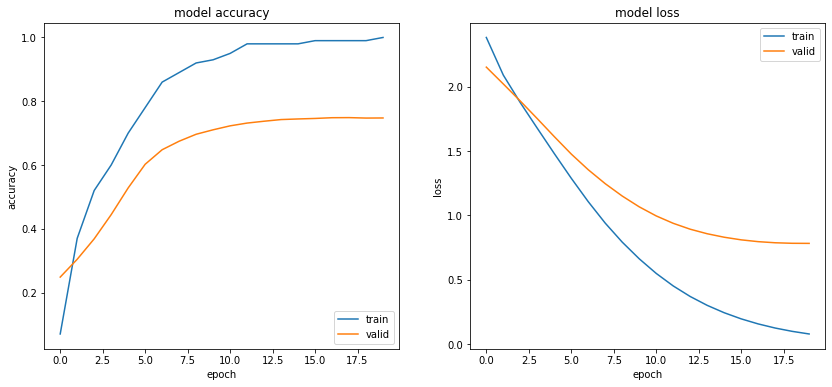

10000/10000 [==============================] - 1s 140us/sample - loss: 0.7832 - acc: 0.7475


[0.7831626571178436, 0.7475]

In [40]:
(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()

# Make train data smaller
np.random.seed(36)
train_data_idx=np.random.choice(range(0,len(x_digits_train)),100,replace=False)
x_digits_train=x_digits_train[train_data_idx]
y_digits_train=y_digits_train[train_data_idx]

# Preprocess data 
x_digits_train = x_digits_train.astype('float32')
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255
x_digits_test = x_digits_test/ 255
y_digits_train = to_categorical(y_digits_train, 10)
y_digits_test = to_categorical(y_digits_test, 10)
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))


# Define model 
model_digits = Sequential()
model_digits.add(Flatten(input_shape=(28,28,1)))
model_digits.add(Dense(500, activation='relu'))
model_digits.add(Dense(50, activation='relu'))
model_digits.add(Dense(10, activation='softmax'))
# Compile model
model_digits.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
history=model_digits.fit(x_digits_train, y_digits_train,validation_data=(x_digits_test, y_digits_test),
                         batch_size=128, epochs=20, verbose=1)

# summarize history for accuracy
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

model_digits.evaluate(x_digits_test,y_digits_test)

Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 1s 9ms/sample - loss: 2.2824 - acc: 0.1200 - val_loss: 2.1950 - val_acc: 0.2929
Epoch 2/20
100/100 [==============================] - 1s 6ms/sample - loss: 2.1010 - acc: 0.5200 - val_loss: 2.0953 - val_acc: 0.3938
Epoch 3/20
100/100 [==============================] - 1s 5ms/sample - loss: 1.9333 - acc: 0.5900 - val_loss: 1.9798 - val_acc: 0.4331
Epoch 4/20
100/100 [==============================] - 0s 3ms/sample - loss: 1.7537 - acc: 0.6400 - val_loss: 1.8568 - val_acc: 0.4621
Epoch 5/20
100/100 [==============================] - 0s 4ms/sample - loss: 1.5639 - acc: 0.6900 - val_loss: 1.7282 - val_acc: 0.4917
Epoch 6/20
100/100 [==============================] - 1s 5ms/sample - loss: 1.3646 - acc: 0.7300 - val_loss: 1.5960 - val_acc: 0.5208
Epoch 7/20
100/100 [==============================] - 0s 4ms/sample - loss: 1.1622 - acc: 0.7600 - val_loss: 1.4601 - val_acc: 0.5647
Epoch 8/20
100

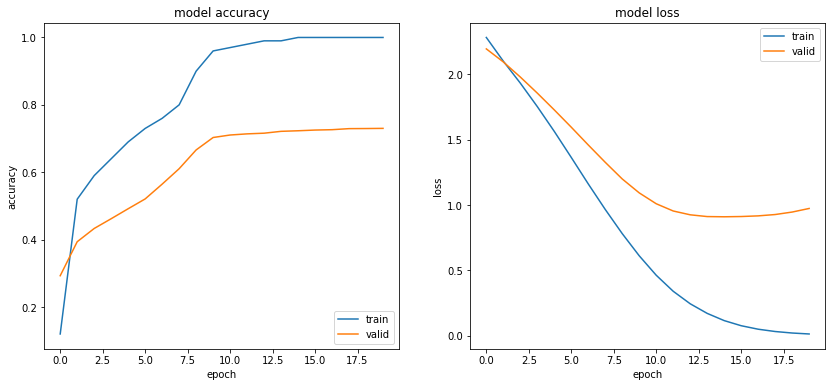

10000/10000 [==============================] - 2s 172us/sample - loss: 0.9744 - acc: 0.7302


[0.9743770132303238, 0.7302]

In [41]:
(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()

# Make train data smaller
np.random.seed(36)
train_data_idx=np.random.choice(range(0,len(x_digits_train)),100,replace=False)
x_digits_train=x_digits_train[train_data_idx]
y_digits_train=y_digits_train[train_data_idx]

# Preprocess data 
x_digits_train = x_digits_train.astype('float32')
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255
x_digits_test = x_digits_test/ 255
y_digits_train = to_categorical(y_digits_train, 10)
y_digits_test = to_categorical(y_digits_test, 10)
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))


# Define model 
model_digits = Sequential()
model_digits.add(Flatten(input_shape=(28,28,1)))
model_digits.add(Dense(500, activation='relu'))
model_digits.add(Dense(200, activation='relu'))
model_digits.add(Dense(100, activation='relu'))
model_digits.add(Dense(50, activation='relu'))
model_digits.add(Dense(10, activation='softmax'))
# Compile model
model_digits.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
history=model_digits.fit(x_digits_train, y_digits_train,validation_data=(x_digits_test, y_digits_test),
                         batch_size=128, epochs=20, verbose=1)

# summarize history for accuracy
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

model_digits.evaluate(x_digits_test,y_digits_test)

Train on 100 samples, validate on 10000 samples
Epoch 1/50
100/100 [==============================] - 1s 6ms/sample - loss: 2.3886 - acc: 0.1200 - val_loss: 2.3070 - val_acc: 0.1408
Epoch 2/50
100/100 [==============================] - 0s 2ms/sample - loss: 2.3260 - acc: 0.1500 - val_loss: 2.2620 - val_acc: 0.1763
Epoch 3/50
100/100 [==============================] - 0s 2ms/sample - loss: 2.2664 - acc: 0.1500 - val_loss: 2.2196 - val_acc: 0.2147
Epoch 4/50
100/100 [==============================] - 0s 2ms/sample - loss: 2.2094 - acc: 0.1900 - val_loss: 2.1796 - val_acc: 0.2487
Epoch 5/50
100/100 [==============================] - 0s 2ms/sample - loss: 2.1549 - acc: 0.2300 - val_loss: 2.1416 - val_acc: 0.2750
Epoch 6/50
100/100 [==============================] - 0s 2ms/sample - loss: 2.1027 - acc: 0.2700 - val_loss: 2.1054 - val_acc: 0.3013
Epoch 7/50
100/100 [==============================] - 0s 2ms/sample - loss: 2.0526 - acc: 0.3000 - val_loss: 2.0707 - val_acc: 0.3244
Epoch 8/50
100

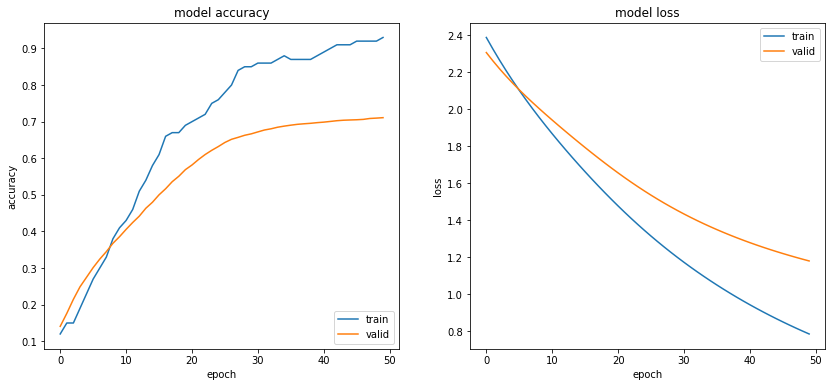

10000/10000 [==============================] - 1s 100us/sample - loss: 1.1805 - acc: 0.7109


[1.1804709787368775, 0.7109]

In [44]:
(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()

# Make train data smaller
np.random.seed(36)
train_data_idx=np.random.choice(range(0,len(x_digits_train)),100,replace=False)
x_digits_train=x_digits_train[train_data_idx]
y_digits_train=y_digits_train[train_data_idx]

# Preprocess data 
x_digits_train = x_digits_train.astype('float32')
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255
x_digits_test = x_digits_test/ 255
y_digits_train = to_categorical(y_digits_train, 10)
y_digits_test = to_categorical(y_digits_test, 10)
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))


# Define model 
model_digits = Sequential()
model_digits.add(Flatten(input_shape=(28,28,1)))
model_digits.add(Dense(10, activation='softmax'))
# Compile model
model_digits.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
history=model_digits.fit(x_digits_train, y_digits_train,validation_data=(x_digits_test, y_digits_test),
                         batch_size=128, epochs=50, verbose=1)

# summarize history for accuracy
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

model_digits.evaluate(x_digits_test,y_digits_test)

Train on 1000 samples, validate on 10000 samples
Epoch 1/20
1000/1000 [==============================] - 1s 1ms/sample - loss: 1.8270 - acc: 0.4620 - val_loss: 1.2016 - val_acc: 0.7133
Epoch 2/20
1000/1000 [==============================] - 0s 367us/sample - loss: 0.8805 - acc: 0.7750 - val_loss: 0.6428 - val_acc: 0.8394
Epoch 3/20
1000/1000 [==============================] - 0s 349us/sample - loss: 0.5010 - acc: 0.8740 - val_loss: 0.4858 - val_acc: 0.8591
Epoch 4/20
1000/1000 [==============================] - 0s 342us/sample - loss: 0.3347 - acc: 0.9080 - val_loss: 0.4176 - val_acc: 0.8781
Epoch 5/20
1000/1000 [==============================] - 0s 413us/sample - loss: 0.2494 - acc: 0.9350 - val_loss: 0.3999 - val_acc: 0.8809
Epoch 6/20
1000/1000 [==============================] - 0s 428us/sample - loss: 0.1968 - acc: 0.9550 - val_loss: 0.3690 - val_acc: 0.8926
Epoch 7/20
1000/1000 [==============================] - 0s 348us/sample - loss: 0.1526 - acc: 0.9670 - val_loss: 0.3486 - val

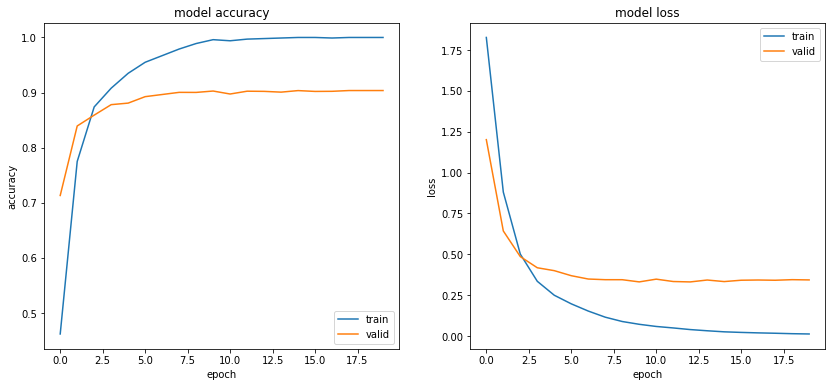

10000/10000 [==============================] - 2s 176us/sample - loss: 0.3432 - acc: 0.9037


[0.34317505368962886, 0.9037]

In [45]:
(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()

# Make train data smaller
np.random.seed(43)
train_data_idx=np.random.choice(range(0,len(x_digits_train)),1000,replace=False)
x_digits_train=x_digits_train[train_data_idx]
y_digits_train=y_digits_train[train_data_idx]

# Preprocess data 
x_digits_train = x_digits_train.astype('float32')
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255
x_digits_test = x_digits_test/ 255
y_digits_train = to_categorical(y_digits_train, 10)
y_digits_test = to_categorical(y_digits_test, 10)
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))


# Define model 
model_digits = Sequential()
model_digits.add(Flatten(input_shape=(28,28,1)))
model_digits.add(Dense(500, activation='relu'))
model_digits.add(Dense(50, activation='relu'))
model_digits.add(Dense(10, activation='softmax'))
# Compile model
model_digits.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
history=model_digits.fit(x_digits_train, y_digits_train,validation_data=(x_digits_test, y_digits_test),
                         batch_size=128, epochs=20, verbose=1)

# summarize history for accuracy
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

model_digits.evaluate(x_digits_test,y_digits_test)

Train on 1000 samples, validate on 10000 samples
Epoch 1/40
1000/1000 [==============================] - 0s 478us/sample - loss: 2.2408 - acc: 0.1850 - val_loss: 2.0550 - val_acc: 0.3073
Epoch 2/40
1000/1000 [==============================] - 0s 334us/sample - loss: 1.9285 - acc: 0.4180 - val_loss: 1.7891 - val_acc: 0.5156
Epoch 3/40
1000/1000 [==============================] - 0s 318us/sample - loss: 1.6750 - acc: 0.6070 - val_loss: 1.5695 - val_acc: 0.6354
Epoch 4/40
1000/1000 [==============================] - 0s 374us/sample - loss: 1.4687 - acc: 0.6910 - val_loss: 1.3909 - val_acc: 0.6962
Epoch 5/40
1000/1000 [==============================] - 0s 217us/sample - loss: 1.3016 - acc: 0.7450 - val_loss: 1.2474 - val_acc: 0.7386
Epoch 6/40
1000/1000 [==============================] - 0s 255us/sample - loss: 1.1668 - acc: 0.7790 - val_loss: 1.1359 - val_acc: 0.7614
Epoch 7/40
1000/1000 [==============================] - 0s 273us/sample - loss: 1.0584 - acc: 0.8030 - val_loss: 1.0447 - v

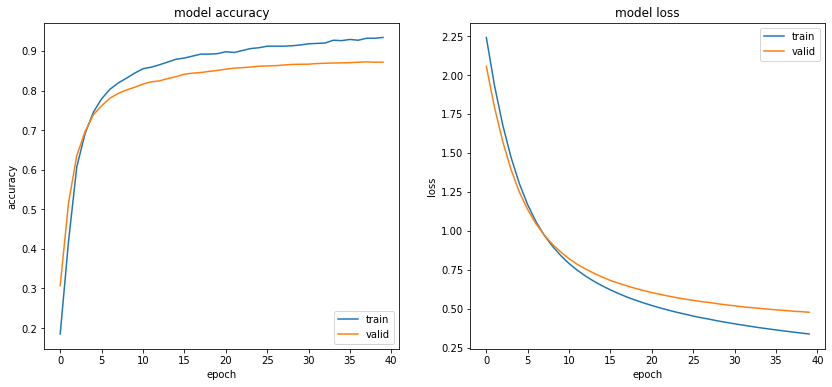

10000/10000 [==============================] - 1s 94us/sample - loss: 0.4768 - acc: 0.8717


[0.4768185261964798, 0.8717]

In [48]:
(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()

# Make train data smaller
np.random.seed(43)
train_data_idx=np.random.choice(range(0,len(x_digits_train)),1000,replace=False)
x_digits_train=x_digits_train[train_data_idx]
y_digits_train=y_digits_train[train_data_idx]

# Preprocess data 
x_digits_train = x_digits_train.astype('float32')
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255
x_digits_test = x_digits_test/ 255
y_digits_train = to_categorical(y_digits_train, 10)
y_digits_test = to_categorical(y_digits_test, 10)
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))


# Define model 
model_digits = Sequential()
model_digits.add(Flatten(input_shape=(28,28,1)))
model_digits.add(Dense(10, activation='softmax'))
# Compile model
model_digits.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
history=model_digits.fit(x_digits_train, y_digits_train,validation_data=(x_digits_test, y_digits_test),
                         batch_size=128, epochs=40, verbose=1)

# summarize history for accuracy
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

model_digits.evaluate(x_digits_test,y_digits_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2665 - acc: 0.9225 - val_loss: 0.1318 - val_acc: 0.9597
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1016 - acc: 0.9700 - val_loss: 0.0946 - val_acc: 0.9705
Epoch 3/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0661 - acc: 0.9805 - val_loss: 0.0792 - val_acc: 0.9760
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0447 - acc: 0.9860 - val_loss: 0.0702 - val_acc: 0.9778
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0324 - acc: 0.9902 - val_loss: 0.0655 - val_acc: 0.9787
Epoch 6/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0259 - acc: 0.9916 - val_loss: 0.0727 - val_acc: 0.9780
Epoch 7/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0211 - acc: 0.9931 - val_loss: 

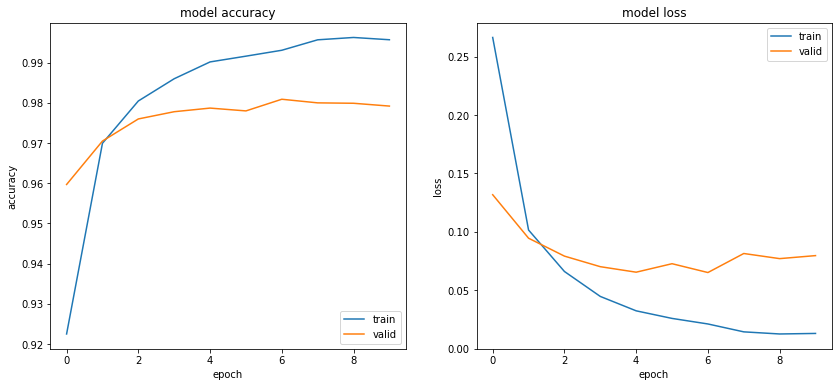

10000/10000 [==============================] - 1s 135us/sample - loss: 0.0797 - acc: 0.9792


[0.07965533805328305, 0.9792]

In [49]:
(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()

# Make train data smaller
#np.random.seed(43)
#train_data_idx=np.random.choice(range(0,len(x_digits_train)),1000,replace=False)
#x_digits_train=x_digits_train[train_data_idx]
#y_digits_train=y_digits_train[train_data_idx]

# Preprocess data 
x_digits_train = x_digits_train.astype('float32')
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255
x_digits_test = x_digits_test/ 255
y_digits_train = to_categorical(y_digits_train, 10)
y_digits_test = to_categorical(y_digits_test, 10)
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))


# Define model 
model_digits = Sequential()
model_digits.add(Flatten(input_shape=(28,28,1)))
model_digits.add(Dense(500, activation='relu'))
model_digits.add(Dense(50, activation='relu'))
model_digits.add(Dense(10, activation='softmax'))
# Compile model
model_digits.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
history=model_digits.fit(x_digits_train, y_digits_train,validation_data=(x_digits_test, y_digits_test),
                         batch_size=128, epochs=10, verbose=1)

# summarize history for accuracy
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

model_digits.evaluate(x_digits_test,y_digits_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.6634 - acc: 0.8388 - val_loss: 0.3806 - val_acc: 0.9033
Epoch 2/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3597 - acc: 0.9026 - val_loss: 0.3209 - val_acc: 0.9127
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3187 - acc: 0.9129 - val_loss: 0.2967 - val_acc: 0.9175
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2993 - acc: 0.9169 - val_loss: 0.2847 - val_acc: 0.9222
Epoch 5/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2874 - acc: 0.9200 - val_loss: 0.2779 - val_acc: 0.9232
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2794 - acc: 0.9227 - val_loss: 0.2758 - val_acc: 0.9236
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2737 - acc: 0.9232 - val_loss: 0

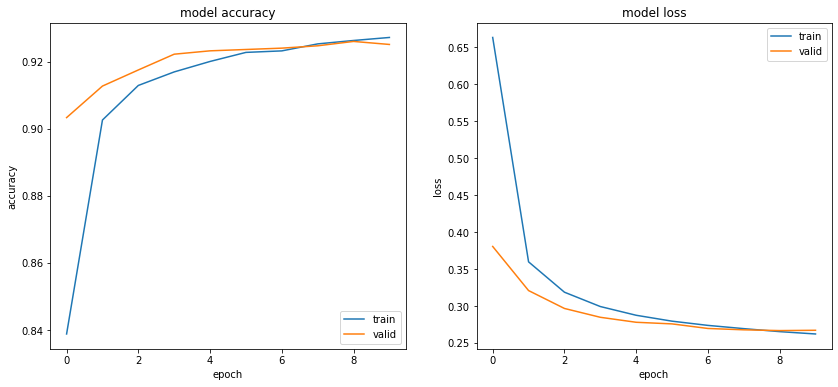

10000/10000 [==============================] - 1s 135us/sample - loss: 0.2671 - acc: 0.9251


[0.2671213430583477, 0.9251]

In [50]:
(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()

# Make train data smaller
#np.random.seed(43)
#train_data_idx=np.random.choice(range(0,len(x_digits_train)),1000,replace=False)
#x_digits_train=x_digits_train[train_data_idx]
#y_digits_train=y_digits_train[train_data_idx]

# Preprocess data 
x_digits_train = x_digits_train.astype('float32')
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255
x_digits_test = x_digits_test/ 255
y_digits_train = to_categorical(y_digits_train, 10)
y_digits_test = to_categorical(y_digits_test, 10)
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))


# Define model 
model_digits = Sequential()
model_digits.add(Flatten(input_shape=(28,28,1)))
model_digits.add(Dense(10, activation='softmax'))
# Compile model
model_digits.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
history=model_digits.fit(x_digits_train, y_digits_train,validation_data=(x_digits_test, y_digits_test),
                         batch_size=128, epochs=10, verbose=1)

# summarize history for accuracy
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

model_digits.evaluate(x_digits_test,y_digits_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2361 - acc: 0.9302 - val_loss: 0.1040 - val_acc: 0.9667
Epoch 2/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0875 - acc: 0.9718 - val_loss: 0.0796 - val_acc: 0.9756
Epoch 3/10
60000/60000 [==============================] - 12s 195us/sample - loss: 0.0588 - acc: 0.9808 - val_loss: 0.0777 - val_acc: 0.9751
Epoch 4/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0418 - acc: 0.9870 - val_loss: 0.0810 - val_acc: 0.9790
Epoch 5/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0380 - acc: 0.9873 - val_loss: 0.0829 - val_acc: 0.9757
Epoch 6/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0287 - acc: 0.9904 - val_loss: 0.0810 - val_acc: 0.9797
Epoch 7/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0270 - acc: 0.9913 

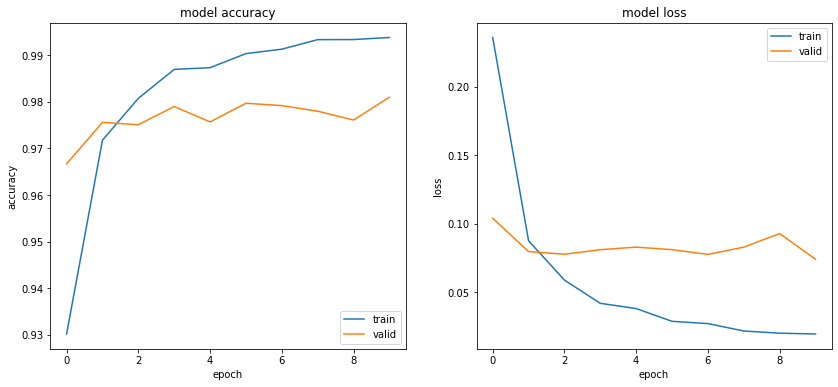

10000/10000 [==============================] - 2s 221us/sample - loss: 0.0740 - acc: 0.9810


[0.07404707426474343, 0.981]

In [51]:
(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()

# Make train data smaller
#np.random.seed(43)
#train_data_idx=np.random.choice(range(0,len(x_digits_train)),1000,replace=False)
#x_digits_train=x_digits_train[train_data_idx]
#y_digits_train=y_digits_train[train_data_idx]

# Preprocess data 
x_digits_train = x_digits_train.astype('float32')
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255
x_digits_test = x_digits_test/ 255
y_digits_train = to_categorical(y_digits_train, 10)
y_digits_test = to_categorical(y_digits_test, 10)
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))


# Define model 
model_digits = Sequential()
model_digits.add(Flatten(input_shape=(28,28,1)))
model_digits.add(Dense(500, activation='relu'))
model_digits.add(Dense(400, activation='relu'))
model_digits.add(Dense(200, activation='relu'))
model_digits.add(Dense(100, activation='relu'))
model_digits.add(Dense(10, activation='softmax'))
# Compile model
model_digits.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
history=model_digits.fit(x_digits_train, y_digits_train,validation_data=(x_digits_test, y_digits_test),
                         batch_size=128, epochs=10, verbose=1)

# summarize history for accuracy
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

model_digits.evaluate(x_digits_test,y_digits_test)